In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import subprocess
from glob import glob
from pkg import *
from pkg.functions import convert2int, convert2str, get_params
from typing import List, Dict, Any

In [2]:
datasets = [1, 4]

myPaths = path.PathManager(datasets=datasets)
myProcessor = process.Processor(paths=myPaths, datasets=datasets)
params = myProcessor.get_parameters()
print(params)
f.get_counts(paths=myPaths, datasets=datasets)

# myDatasetManager = data.DatasetManager(paths=myPaths, datasets=datasets)

# train_loader, test_loader = f.prepare(data_manager=myDatasetManager, batch_size=10)

Water backgrounds initialized: 2
{'01': {'clen': 0.15, 'photon_energy': 6000}, '04': {'clen': 0.25, 'photon_energy': 6000}}
Paths refreshed for dataset ['01', '04'].
Directory: peaks/01
	Total files: 58
	Normal images: 39
	Empty images: 19
Directory: labels/01
	Total files: 97
	Normal images: 78
	Empty images: 19
Directory: peaks_water_overlay/01
	Total files: 97
	Normal images: 78
	Empty images: 19
Directory: peaks/04
	Total files: 21
	Normal images: 14
	Empty images: 7
Directory: labels/04
	Total files: 35
	Normal images: 28
	Empty images: 7
Directory: peaks_water_overlay/04
	Total files: 35
	Normal images: 28
	Empty images: 7


In [3]:
f.check_attributes(paths=myPaths, datasets=f.convert2str(datasets), dir_type='peak')
print(myProcessor.get_parameters())

f.retrieve_attributes(file_path=myPaths.total_paths.water_background[0])

c:\Users\eseveret\Desktop\cxls_hitfinder\images\peaks\01\empty_peak_01_00001.h5 conforms to expected attributes.
c:\Users\eseveret\Desktop\cxls_hitfinder\images\peaks\01\empty_peak_01_00001.h5:
Expected Peak: False, Actual Peak: False
c:\Users\eseveret\Desktop\cxls_hitfinder\images\peaks\01\empty_peak_01_00002.h5 conforms to expected attributes.
c:\Users\eseveret\Desktop\cxls_hitfinder\images\peaks\01\empty_peak_01_00002.h5:
Expected Peak: False, Actual Peak: False
c:\Users\eseveret\Desktop\cxls_hitfinder\images\peaks\01\empty_peak_01_00003.h5 conforms to expected attributes.
c:\Users\eseveret\Desktop\cxls_hitfinder\images\peaks\01\empty_peak_01_00003.h5:
Expected Peak: False, Actual Peak: False
c:\Users\eseveret\Desktop\cxls_hitfinder\images\peaks\01\empty_peak_01_00004.h5 conforms to expected attributes.
c:\Users\eseveret\Desktop\cxls_hitfinder\images\peaks\01\empty_peak_01_00004.h5:
Expected Peak: False, Actual Peak: False
c:\Users\eseveret\Desktop\cxls_hitfinder\images\peaks\01\emp

{'clen': 0.15, 'peak': False, 'photon_energy': 6000}

In [4]:
f.get_counts(paths=myPaths, datasets=datasets)
# %run process_directory.py ../../images  --percent_empty 0.5 

Paths refreshed for dataset ['01', '04'].
Directory: peaks/01
	Total files: 58
	Normal images: 39
	Empty images: 19
Directory: labels/01
	Total files: 97
	Normal images: 78
	Empty images: 19
Directory: peaks_water_overlay/01
	Total files: 97
	Normal images: 78
	Empty images: 19
Directory: peaks/04
	Total files: 21
	Normal images: 14
	Empty images: 7
Directory: labels/04
	Total files: 35
	Normal images: 28
	Empty images: 7
Directory: peaks_water_overlay/04
	Total files: 35
	Normal images: 28
	Empty images: 7


In [5]:
myDataManager = data.DatasetManager(paths=myPaths, datasets=datasets, transform=None)


train_loader, test_loader = f.prepare(data_manager=myDataManager, batch_size=10)

Actual percentage of empty images: 22.740524781341108% across peaks, water_overlays, and labels directories.

Final dataset sizes - Peaks: 79, Labels: 132, Overlays: 132

Data prepared.
Train size: 105
Test size: 27
Batch size: 10
Number of batches in train_loader: 11 



In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
optimizer = optim.Adam

cfg = {
    "loader": [train_loader, test_loader],
    'num_epochs': 15,
    'batch_size': train_loader.batch_size,
    'optimizer': optimizer,
    'device': device,
    }


peak_config = eval.Peak_Detection_Configuration(myPaths, datasets, device)
print(peak_config.get_loss_weights())
photon_config = eval.Photon_Energy_Configuration(myPaths, datasets, device)
print(photon_config.get_loss_weights())
clen_config = eval.Camera_Length_Configureation(myPaths, datasets, device)
print(clen_config.get_loss_weights())

cuda
Paths refreshed for dataset ['01', '04'].
tensor([0.2453])
Paths refreshed for dataset ['01', '04'].
tensor([1.0000, 2.7714, 1.0000])
Paths refreshed for dataset ['01', '04'].
tensor([1.0000, 2.7714, 1.0000])


Model testing and validating: Multi_Class_CNN1
Looking for the feature: peak
-- epoch 0
Train loss: 0.2534471574154767
Train accuracy: 0.800000011920929
Test loss: 0.06807445585727692
Test accuracy: 0.8148148059844971
-- epoch 1
Train loss: 0.23699120499870993
Train accuracy: 0.5904762148857117
Test loss: 0.06229548454284668
Test accuracy: 0.7037037014961243
-- epoch 2
Train loss: 0.22575667094100604
Train accuracy: 0.5714285969734192
Test loss: 0.05897780209779739
Test accuracy: 0.7037037014961243
-- epoch 3
Train loss: 0.2201409014788541
Train accuracy: 0.5904762148857117
Test loss: 0.056869512796401976
Test accuracy: 0.7037037014961243
-- epoch 4
Train loss: 0.22174873677167026
Train accuracy: 0.5714285969734192
Test loss: 0.05498023629188538
Test accuracy: 0.7037037014961243
-- epoch 5
Train loss: 0.2072505002672022
Train accuracy: 0.5714285969734192
Test loss: 0.05375789701938629
Test accuracy: 0.7037037014961243
-- epoch 6
Train loss: 0.20357701995156027
Train accuracy: 0.5714285

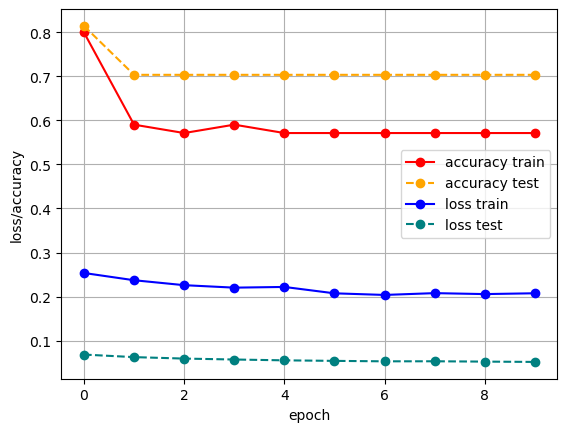

-- Labels      : [[1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]]
-- Predictions : [[0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]]


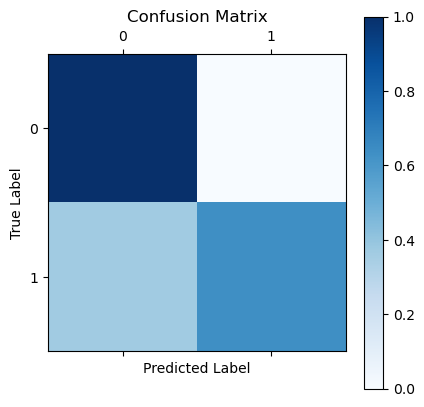

array([[1.        , 0.        ],
       [0.36363636, 0.63636364]])

In [7]:
a = train_eval.TrainTestModels(cfg, peak_config)
a.epoch_loop()
a.plot_loss_accuracy()
a.plot_confusion_matrix()
a.get_confusion_matrix()

In [8]:
b = train_eval.TrainTestModels(cfg, photon_config)
b.epoch_loop()
b.plot_loss_accuracy()
b.plot_confusion_matrix()
b.get_confusion_matrix()

Model testing and validating: Multi_Class_CNN1
Looking for the feature: photon_energy
-- epoch 0
Train loss: 0.5628397482108664
Train accuracy: 0.7142857313156128
Test loss: 0.00023193339038698468
Test accuracy: 1.0
-- epoch 1


KeyboardInterrupt: 

Model testing and validating: Multi_Class_CNN1
Looking for the feature: clen
-- epoch 0
Train loss: 0.4631336033344269
Train accuracy: 0.800000011920929
Test loss: 0.24182372987270356
Test accuracy: 1.0
-- epoch 1
Train loss: 0.13045930489897728
Train accuracy: 1.0
Test loss: 0.08239501863718032
Test accuracy: 1.0
-- epoch 2
Train loss: 0.05406050916228976
Train accuracy: 1.0
Test loss: 0.03748168908059597
Test accuracy: 1.0
-- epoch 3
Train loss: 0.030483136574427288
Train accuracy: 1.0
Test loss: 0.02360107395797968
Test accuracy: 1.0
-- epoch 4
Train loss: 0.020546758857866127
Train accuracy: 1.0
Test loss: 0.016801757924258708
Test accuracy: 1.0
-- epoch 5
Train loss: 0.014632397575215214
Train accuracy: 1.0
Test loss: 0.014133453369140625
Test accuracy: 1.0
-- epoch 6
Train loss: 0.011153684308131536
Train accuracy: 1.0
Test loss: 0.01083530429750681
Test accuracy: 1.0
-- epoch 7
Train loss: 0.008662151206018669
Train accuracy: 1.0
Test loss: 0.008413200546056033
Test accuracy: 1.

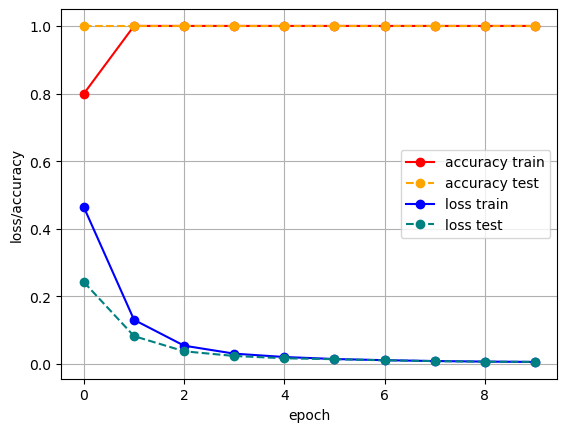

-- Labels      : [2 1 1 1 2 1 1 2 1 1 2 2 1 1 1 1 2 1 2 2 1 1 2 1 1 1 1]
-- Predictions : [2 1 1 1 2 1 1 2 1 1 2 2 1 1 1 1 2 1 2 2 1 1 2 1 1 1 1]


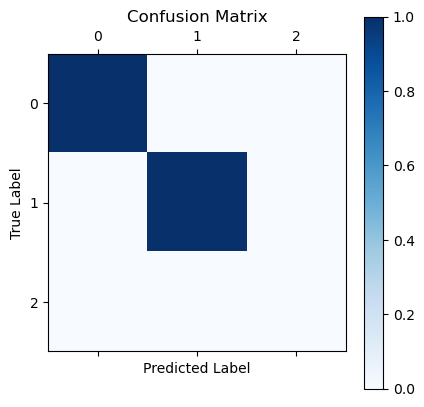

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.]])

In [ ]:
c = train_eval.TrainTestModels(cfg, clen_config)
c.epoch_loop()
c.plot_loss_accuracy()
c.plot_confusion_matrix()
c.get_confusion_matrix()

In [ ]:
"""
How I want the pipeline to look.

cnn1_path = '../models/cnn1'
cnn2_path = '../models/cnn2'
cnn3_path = '../models/cnn3'

cnn1 = m.BasicCNN1()
cnn2 = m.BasicCNN2()
cnn3 = m.BasicCNN3()

pipeline = pipe.ModelPipeline(cnn1_path, cnn2_path, cnn3_path, cnn1, cnn2, cnn3)
pipeline.run(image)
pipeline.evaluate_results(image_path)
"""

"\nHow I want the pipeline to look.\n\ncnn1_path = '../models/cnn1'\ncnn2_path = '../models/cnn2'\ncnn3_path = '../models/cnn3'\n\ncnn1 = m.BasicCNN1()\ncnn2 = m.BasicCNN2()\ncnn3 = m.BasicCNN3()\n\npipeline = pipe.ModelPipeline(cnn1_path, cnn2_path, cnn3_path, cnn1, cnn2, cnn3)\npipeline.run(image)\npipeline.evaluate_results(image_path)\n"